In [248]:
import pandas as pd
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

#Read in the data
features = pd.read_csv('filtered_10.csv')
features.drop(['stop_sequence', 'route_id', 'Origin', 'Destination'], axis = 1, inplace = True)
features.head(5)

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24,monday,tuesday,wednesday,thursday,friday,saturday,sunday,delay
0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1.0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1.0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1.0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1.0


In [249]:
features = features.dropna()

In [250]:
# Numpy to convert to arrays
import numpy as np


#Remove labels from features
# Axis 1 means colums
X = features.drop('delay', axis = 1)

#Labels are values we want to predict
y = features['delay']

# Saving features names for later use
feature_list = list(X.columns)

# Converting features to numpy array
#features = np.array(features)

X_np= np.array(features)

print(feature_list)

['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']


In [251]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 42)


In [252]:
#Creating the neural network model
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.backend import set_session
from tensorflow.python.keras import backend as K


tf.compat.v1.disable_v2_behavior()

sess = K.get_session()

model = Sequential()

model.add(Dense(128, activation = 'relu', input_dim = 15))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [253]:
model.fit(X_train, y_train, epochs = 100)

Train on 87 samples
Epoch 1/100
87/87 [==============================] - 2s 19ms/sample - loss: 399.5257
Epoch 2/100
87/87 [==============================] - 0s 161us/sample - loss: 398.9298
Epoch 3/100
87/87 [==============================] - 0s 115us/sample - loss: 398.4552
Epoch 4/100
87/87 [==============================] - 0s 126us/sample - loss: 398.0501
Epoch 5/100
87/87 [==============================] - 0s 126us/sample - loss: 397.5671
Epoch 6/100
87/87 [==============================] - 0s 127us/sample - loss: 396.9824
Epoch 7/100
87/87 [==============================] - 0s 126us/sample - loss: 396.2711
Epoch 8/100
87/87 [==============================] - 0s 126us/sample - loss: 395.3791
Epoch 9/100
87/87 [==============================] - 0s 115us/sample - loss: 394.4446
Epoch 10/100
87/87 [==============================] - 0s 138us/sample - loss: 393.5134
Epoch 11/100
87/87 [==============================] - 0s 115us/sample - loss: 392.4542
Epoch 12/100
87/87 [=============

In [254]:
X_train_vals=X_train.values

In [255]:
X_test_vals = X_test.values
type(X_test_vals)
X_test_vals.shape
print(X_test_vals)

[[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]]


In [256]:
import shap
# Fits the explainer
explainer = shap.DeepExplainer((model.input, model.output), data=X_train_vals, session=sess)
# Calculates the SHAP values - It takes some time
#shap_values = explainer.shap_values(X_test)

C:\Users\bhatt\AppData\Roaming\Python\Python311\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [257]:
sample = X_train_vals
shap_values = explainer.shap_values(X_test_vals)

In [258]:
X_test_vals.shape
shap_values_squeezed = np.squeeze(shap_values, axis=-1)

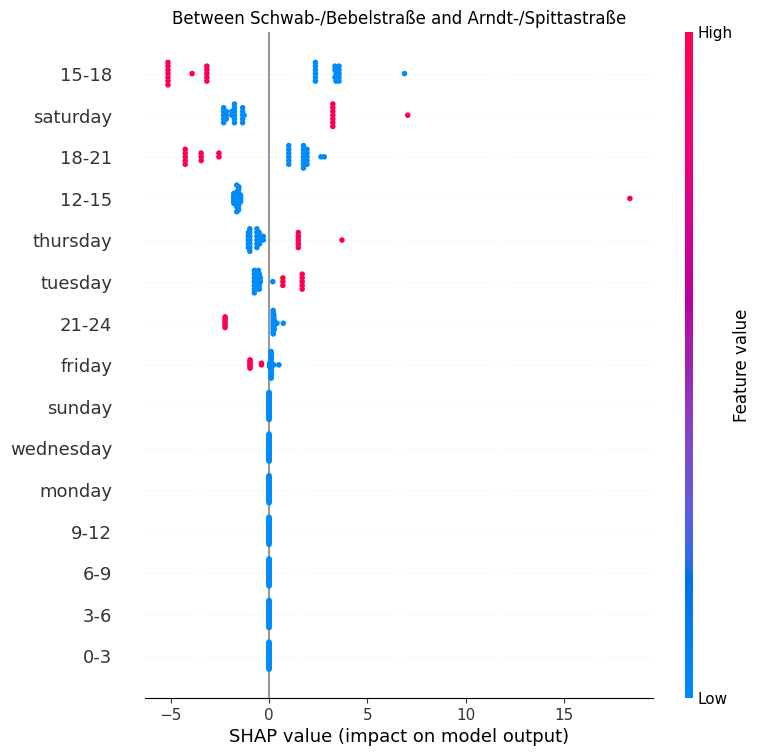

In [259]:
shap.summary_plot(shap_values_squeezed, X_test_vals, feature_names=feature_list, show=False)
plt.title("Between Schwab-/Bebelstraße and Arndt-/Spittastraße")
plt.show()